# Modelo de Ising (el problema de Onsanger)

Aquino Chapa Martha Abril

In [1]:
using Plots
using Roots
using BenchmarkTools

In [2]:
#También declaramos las constantes
#definimos la constante de boltzman como 1 para que los resultados tengan mejor visualización
kb = 1
#Se declara con esee valor J por consenso del grupo :)
J=0.5;

Iniciamos creando la red cuadrada de $N^2$ elementos, la cual en vez de presentarla como una matriz será un arreglo

$$RED = [1,2,3,...,N^2] $$

In [3]:
#función que genera una red considerando de manera aleatoria los elememtos de la red: -1 o 1
#El total de elementos en la red es N^2
function generador_de_red(N)
    return  [rand([-1,1]) for i in 1:N^2]
end

generador_de_red (generic function with 1 method)

In [4]:
#Probando la función:
N_prueba=3 
red_prueba = generador_de_red(N_prueba);

Ahora generamos un arreglo en el cual en cada fila se encuentren acomodados los vecinos del i-ésimo elemento. 
Estarán acomodados de la siguiente manera: [vecino de arriba, vecino de la derecha, vecino de abajo, vecino de la izquierda]

In [5]:
function generador_indice_vecinos(red)
    N² = length(red)
    N= Int((N²)^(1/2))
    v = zeros(Int64,(N²,4))
    #v[i] = [arriba, derecha, abajo, izquierda]

    #Obtenemos el arreglado donde acomodamos los situos de los
    
    #Iniciamos a indexar los vecinos de arriba
    for j in 1:N²
        if j+N<= N²
            v[j,1] = j+N 

        elseif j+N>N²
            v[j,1] = j - N*(N-1)
        end

        #Para los vecinos de la derecha
        if j%N != 0 
            v[j,2] = j+1
        elseif j%N ==0
            v[j,2] = j-N+1 
        end


        #Para los vecinos de abajo

        if j-N>=1
            v[j,3] = j-N
        elseif j-N<1
            v[j,3] =j+N*(N-1)
        end

        #Para los vecinos izquierda

        if (j-1)%N != 0
            v[j,4] = j-1
        elseif (j-1)%N ==0
            v[j,4] = j+N-1
        end
    end
    #Regresamos el arreglo donde están los vecinos
    return v
end

generador_indice_vecinos (generic function with 1 method)

In [7]:
#Probando la función con la red de prueba
vecinos_prueba = generador_indice_vecinos(red_prueba);

En el modelo de Ising considerando geometría cuadrada se tiene que la energía de interacción de un elemento con sus vecinos está dada por
$$E= -J\sum_{<ij>}S_iS_j $$

Por lo que la energía de un elemento se calcula con la siguiente función

Creamos una función que nos devuelva la energía total del sistema 

In [51]:
function energia_total_del_sistema(red_lista)
    #generamos los indices de los vecinos
    vecinos_lista = generador_indice_vecinos(red_lista)
    #Creamos un arreglo donde iremos sumando cada elemento de la suma de la energía total
    energia_total = 0
    #Creamos un arreglo que obtenga la energía de interacción de cada elemento de la red
    N² = length(red_lista)
    for i in 1:N²
        #Obtenemos los indices de los vecinos
        vecinosi= vecinos_lista[i]
        for j in vecinosi
            energia_total += red_lista[i]*red_lista[j]
        end
    
    end
    return energia_total
end

energia_total_del_sistema (generic function with 2 methods)

In [50]:
energia_total_prueba = energia_total_del_sistema(red_prueba)

-3

In [30]:
function magnetizacion(red_lista)
    return sum(red_lista)
end

magnetizacion (generic function with 1 method)

In [31]:
magnetizacion_prueba = magnetizacion(red_prueba)

1

### Implementando el algoritmo de Metropolis

Generando el algoritmo de Metropolis
$$\frac{p_i}{p_j} = e^{(-\beta(E_i-E_j))} $$
y queremos encontrar el estado de equilibrio

In [30]:
function energia_por_elemento(elemento,elemento_indice,vecinos_indices,red_lista,J)### Indice del elemento de 
    #Variable donde se almacenará la suma de los elementos de la energía
    energia_suma = 0
    for i in 1:4
        indice_vecino = Int(vecinos_indices[elemento_indice,i])
        energia_suma += elemento*red_lista[indice_vecino]
    end
    return energia_suma*(-J)
    
end

energia_por_elemento (generic function with 1 method)

In [68]:
#Función que modifica la red para evolucionarla a una red en equilibrio con mayor probabilidad
#Inicia recopilando la red y la temperatura y define Q como 5000 iteraciones por default
function ising(red_inicial,T,Q=5000) 
    #Obtenemos la longitud de la red
    N² = length(red_inicial)
    #hacemos una copia de la red
    red_inicial = copy(red_inicial)
    #Definimos dos arreglos donde se vaya anexando la energia total del sistema i
    E = []
    #La magnetización del i-ésimo sistema
    M = []
    #Un conteo de los volteos de spines
    flips = []
    #obtenemos los vecinos de la red, como esto sólo nos da los indices de la red no es necesario cambiar su valor
    #en cada iteración
    vecinos = generador_indice_vecinos(red_inicial)
    flips_contador = 0
    #Iniciamos las iteraciones
    for i in 1:Q
        #Definimos el elemento al que se le cambiará el spin aleatoriamente 
        j = Int(rand(1:length(red_inicial)))
        #Obtenemos el spin inicial de la red 
        spin_inicial = red_inicial[j] 
        energia_inicial = energia_total_del_sistema(red_inicial)
        #La propuesta para cambiar el spin
        spin_final = spin_inicial*(-1)
        red_final = copy(red_inicial)
        red_final[j] = spin_final
        energia_final = energia_total_del_sistema(red_final)
        
        dE= energia_final-energia_inicial
        if dE<0
            red_inicial[j] = spin_final
        elseif (rand()<exp(-dE/T))
            red_inicial[j] = spin_final
        end
        if red_inicial != red_final
            append!(E,energia_final)
            append!(M,sum(red_inicial))
            flips_contador +=1
            append!(flips,flips_contador)
        end
    end
    return E, M, flips
end

ising (generic function with 2 methods)

In [70]:
spines, energias, flips = ising(red_prueba,1.5)

(Any[1, 1, 1, 1, 5, 1, 1, 1, 1, 1  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1], Any[-3, -3, -1, -1, 5, -1, -1, 1, 1, 1  …  3, 3, -1, 3, 1, 1, 3, 3, 3, 3], Any[1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560])

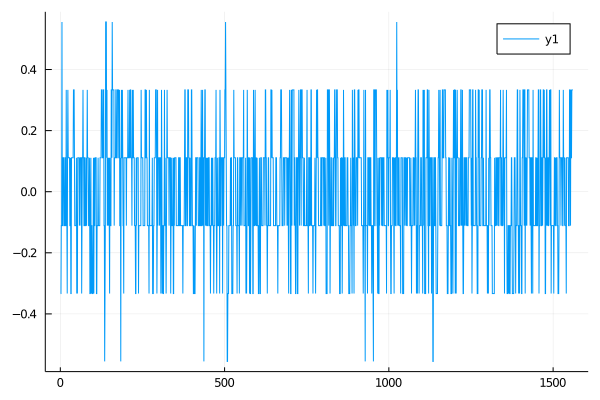

In [72]:
plot(flips,energias./N_prueba^2)       

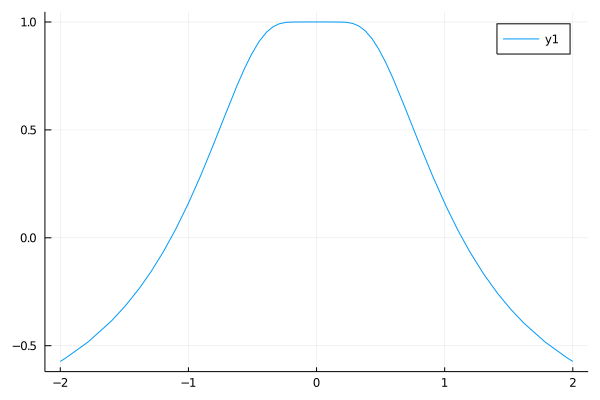

In [9]:
f(x) = 2*(tanh(2*0.5/(kb*x)))^2-1
plot(f, -2 ,2)


In [10]:
Tc = find_zeros(f, 0, 5) 

1-element Array{Float64,1}:
 1.1345926571065108

### Tiempos de ejecución 

In [43]:
red_20 = generador_de_red(20) 
@benchmark ising(red_20,1/(1.1345926571065108))

BenchmarkTools.Trial: 1504 samples with 1 evaluation.
 Range (min … max):  2.905 ms …   6.887 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     3.072 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   3.313 ms ± 586.152 μs  ┊ GC (mean ± σ):  0.93% ± 4.70%

  ▁▆█▇▅▅▃▃▁      ▁▁▃▁                                          
  █████████▇█▇█▇▇█████▇▇▅▇▆▄▄▆▇▇▅▆▆▅▅▅▅▆▄▅▅▄▄▅▆▆▄▅▆▇▅█▆▆▄▅▁▅▅ █
  2.9 ms       Histogram: log(frequency) by time      5.67 ms <

 Memory estimate: 641.06 KiB, allocs estimate: 35007.

In [45]:
red_40 = generador_de_red(40) 
@benchmark ising(red_40,1/(1.1345926571065108))   

BenchmarkTools.Trial: 342 samples with 1 evaluation.
 Range (min … max):  12.035 ms … 29.986 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     13.017 ms              ┊ GC (median):    0.00%
 Time  (mean ± σ):   14.563 ms ±  3.480 ms  ┊ GC (mean ± σ):  0.60% ± 3.07%

  ▆█▆▅▃▂▃▃▂▁  ▁                                                
  █████████████▇▆▆▄█▆▆▄▄▆█▄▁▄▆█▁▁▄▆▇▄▆▄▁▆▆▄▁▁▁▄▆▆▆▁▁▄▁▁▁▁▁▆▁▄ ▆
  12 ms        Histogram: log(frequency) by time      28.2 ms <

 Memory estimate: 791.02 KiB, allocs estimate: 41608.

In [46]:
red_50 = generador_de_red(50) 
@benchmark ising(red_50,1/(1.1345926571065108))

BenchmarkTools.Trial: 227 samples with 1 evaluation.
 Range (min … max):  18.439 ms … 47.959 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     19.854 ms              ┊ GC (median):    0.00%
 Time  (mean ± σ):   21.977 ms ±  4.668 ms  ┊ GC (mean ± σ):  0.39% ± 2.41%

  ▃██▃▂                                                        
  █████▇▅▄▄▃▄▃▂▄▃▃▃▃▃▁▃▃▃▁▂▁▃▂▃▃▃▂▁▁▂▂▃▂▁▁▂▃▁▂▃▂▁▁▂▁▁▁▁▁▁▁▁▁▂ ▃
  18.4 ms         Histogram: frequency by time        39.1 ms <

 Memory estimate: 844.97 KiB, allocs estimate: 42813.

In [47]:
red_100 = generador_de_red(100) 
@benchmark ising(red_100,1/(1.1345926571065108))

BenchmarkTools.Trial: 68 samples with 1 evaluation.
 Range (min … max):  67.230 ms … 102.927 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     72.264 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   74.295 ms ±   6.891 ms  ┊ GC (mean ± σ):  0.11% ± 0.88%

    ▆█▁▁█▃▁   ▃ ▃   ▁                                           
  ▄▁███████▁▇▄█▁█▇▄▁█▇▇▁▁▇▄▁▁▁▄▁▁▇▄▁▁▄▁▁▁▄▄▁▁▇▄▁▁▁▁▁▁▁▁▁▁▁▁▁▄▄ ▁
  67.2 ms         Histogram: frequency by time         92.9 ms <

 Memory estimate: 1.14 MiB, allocs estimate: 44425.

In [ ]:
malla_elementos = [20,40,50,100]
for i in malla_elementos
    red = generador_de_red(i) 
   plot!() 
end

### Calculando cuanto tiempo se tarda en pasar de un estado frío a uno caliente

In [66]:
red_fria_20 = [-1 for i in 1:40]

40-element Array{Int64,1}:
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
  ⋮
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1

In [78]:
red_fria = [1 for i in  1:20^2]
pruebasss = ising(red_fria,1.5)

(Any[352, 244, 228, 208, 192, 184, 176, 164, 132, 120  …  -244, -244, -244, -244, -244, -244, -240, -244, -244, -248], Any[372, 306, 294, 282, 268, 264, 260, 256, 232, 224  …  -2, -2, -2, -2, -2, 0, -2, 0, 0, -2], Any[1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  2786, 2787, 2788, 2789, 2790, 2791, 2792, 2793, 2794, 2795])

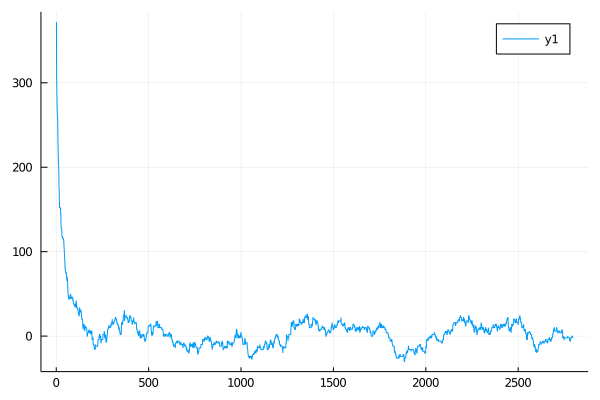

In [79]:
plot(pruebasss[3],pruebasss[2])